# AVOCADO PROJECT PROBLEM STATEMENT
Avocado is a fruit consumed by people heavily in the United States.

Content This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation AveragePrice - the average price of a single avocado type - conventional or organic year - the year Region - the city or region of the observation Total Volume - Total number of avocados sold 4046 - Total number of avocados with PLU 4046 sold 4225 - Total number of avocados with PLU 4225 sold 4770 - Total number of avocados with PLU 4770 sold

task is to make a mode that can consider the data provided and predict the Average Price.

# IMPORTING THE DATASETS

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('avocados.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


top 5 heads of the dataset.

In [3]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


bottom 5 of the datasets.

In [4]:
df.shape

(18249, 14)

We have 18249 rows and 14 columns in the dataset.

# CHECKING NULL VALUES IN THE DATAFRAME

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
PLU4046         0
PLU4225         0
PLU4770         0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values in the dataset.

<AxesSubplot:>

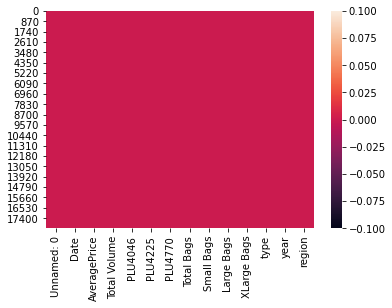

In [6]:
# Checking null values through heatmap
sns.heatmap(df.isnull())

Heatmap is showing no null values in the dataset.

# CHECKING DATATYPES OF THE COLUMNS

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
PLU4046         float64
PLU4225         float64
PLU4770         float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

we have 2 integer data type columns, 3 object data type columns and remaining all columns are for float data type.

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', 'PLU4046',
       'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

# SHOWING INTEGER TYPE COLUMNS

In [9]:
int_col=[]

for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
        int_col.append(x)
        
int_col        

['Unnamed: 0', 'year']

In [10]:
# Showing unique values
df['year'].value_counts(())

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

Most number of counts is in the year 2017 that is 5722, counts in year 2015,2016 and 2017 is approx same.
and the year 2018 is least number of counts

# SHOWING OBJECT TYPE COLUMNS

In [11]:
cat_col=[]

for x  in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
        
cat_col        

['Date', 'type', 'region']

In [12]:
# showing unique values
df['Date'].unique()

array(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
       '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
       '2015-11-01', '2015-10-25', '2015-10-18', '2015-10-11',
       '2015-10-04', '2015-09-27', '2015-09-20', '2015-09-13',
       '2015-09-06', '2015-08-30', '2015-08-23', '2015-08-16',
       '2015-08-09', '2015-08-02', '2015-07-26', '2015-07-19',
       '2015-07-12', '2015-07-05', '2015-06-28', '2015-06-21',
       '2015-06-14', '2015-06-07', '2015-05-31', '2015-05-24',
       '2015-05-17', '2015-05-10', '2015-05-03', '2015-04-26',
       '2015-04-19', '2015-04-12', '2015-04-05', '2015-03-29',
       '2015-03-22', '2015-03-15', '2015-03-08', '2015-03-01',
       '2015-02-22', '2015-02-15', '2015-02-08', '2015-02-01',
       '2015-01-25', '2015-01-18', '2015-01-11', '2015-01-04',
       '2016-12-25', '2016-12-18', '2016-12-11', '2016-12-04',
       '2016-11-27', '2016-11-20', '2016-11-13', '2016-11-06',
       '2016-10-30', '2016-10-23', '2016-10-16', '2016-

So many unique values are available in the 'Date' column.

In [13]:
df['type'].unique

<bound method Series.unique of 0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object>

So many unique values are available in the 'type' column.

In [14]:
df['region'].unique

<bound method Series.unique of 0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object>

So many unique values are available in the 'region' column.



# SHOWING FLOAT TYPE COLUMNS


In [15]:
float_col=[]

for x in df.dtypes.index:
    if df.dtypes[x]=='float64':
        float_col.append(x)
        
float_col        

['AveragePrice',
 'Total Volume',
 'PLU4046',
 'PLU4225',
 'PLU4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

# CHECKING VALUE COUNTS OF THE COLUMNS


In [16]:
for col in df:
    print(col)
    print(df[col].value_counts())
    print()

Unnamed: 0
0     432
3     432
11    432
10    432
9     432
8     432
6     432
5     432
4     432
7     432
2     432
1     432
34    324
28    324
41    324
48    324
26    324
42    324
32    324
27    324
43    324
12    324
44    324
13    324
29    324
45    324
14    324
30    324
46    324
15    324
31    324
25    324
40    324
50    324
37    324
18    324
19    324
35    324
20    324
36    324
49    324
24    324
21    324
33    324
22    324
38    324
16    324
23    324
39    324
17    324
47    324
51    322
52    107
Name: Unnamed: 0, dtype: int64

Date
2016-12-11    108
2015-02-15    108
2015-01-25    108
2016-09-18    108
2016-01-24    108
             ... 
2017-02-19    108
2015-03-15    108
2017-06-18    107
2015-12-06    107
2017-06-25    107
Name: Date, Length: 169, dtype: int64

AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: 

# VISUALIZATION OF CTEGORICAL DATA

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

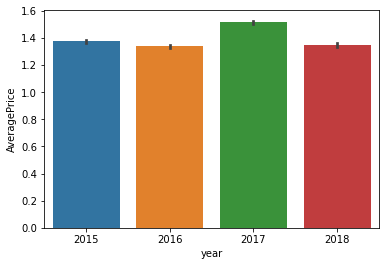

In [17]:
# through barplot plot comparison between year and average price
sns.barplot(x='year', y='AveragePrice',data=df)

All the bars looking same and most number of counts is in year 2017.

conventional    9126
organic         9123
Name: type, dtype: int64


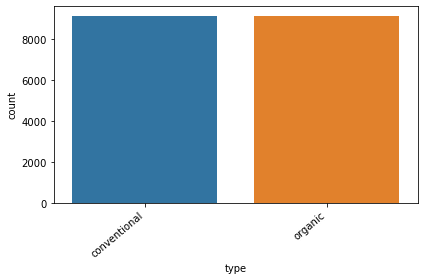

In [18]:
ax=sns.countplot(x='type',data=df)
print(df['type'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

There are two types of avocaods with almost equal equal distribution
.conventional with 9126 and organic with 9123

West                   338
Detroit                338
Tampa                  338
Syracuse               338
Sacramento             338
Plains                 338
LasVegas               338
California             338
BaltimoreWashington    338
Portland               338
MiamiFtLauderdale      338
Denver                 338
DallasFtWorth          338
Chicago                338
Houston                338
RaleighGreensboro      338
CincinnatiDayton       338
Indianapolis           338
PhoenixTucson          338
TotalUS                338
NorthernNewEngland     338
Jacksonville           338
BuffaloRochester       338
SouthCentral           338
Spokane                338
Albany                 338
NewYork                338
Boston                 338
GrandRapids            338
HarrisburgScranton     338
Pittsburgh             338
Midsouth               338
Orlando                338
NewOrleansMobile       338
LosAngeles             338
RichmondNorfolk        338
Seattle                338
B

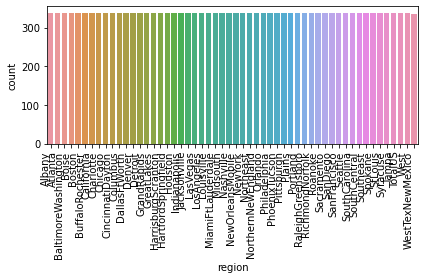

In [19]:
ax=sns.countplot(x='region',data=df)
print(df['region'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

Regions are almost same.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


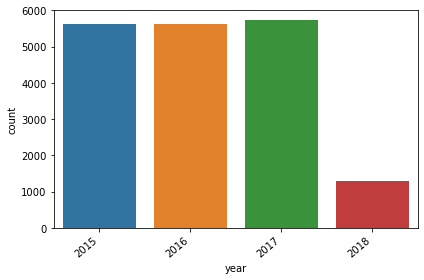

In [20]:
ax=sns.countplot(x='year',data=df)
print(df['year'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

In year 2017 there is maximum count that is 5722 and in the year 2018 there is least number of counts that is 1296.

# CHECKING DISTRIBUTION

In [21]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
PLU4046         float64
PLU4225         float64
PLU4770         float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

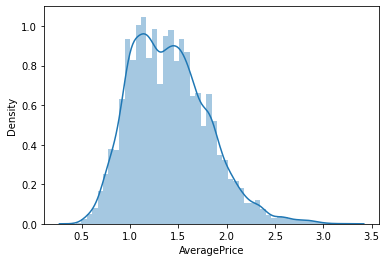

In [22]:
sns.distplot(df['AveragePrice'],kde=True)

Looking normally distributed ,within range of 0.5 to 3.0

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

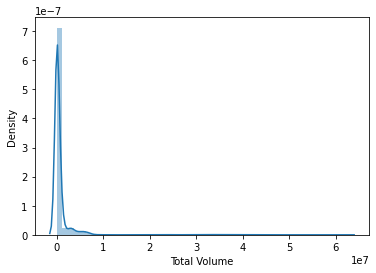

In [23]:
sns.distplot(df['Total Volume'],kde=True)

Looking left skewed, within range of 0 to 1.

<AxesSubplot:xlabel='PLU4046', ylabel='Density'>

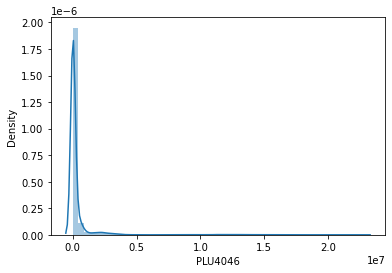

In [24]:
sns.distplot(df['PLU4046'],kde=True)

PLU4046' column is indicating Total number of avocado with PLU(size of the avocado) and ranges in between 0 to .5 and it is left skewed.

<AxesSubplot:xlabel='PLU4770', ylabel='Density'>

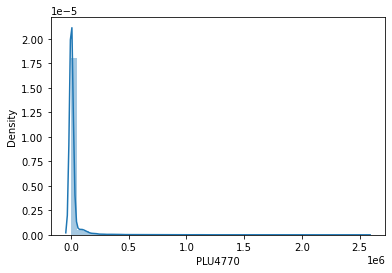

In [25]:
sns.distplot(df['PLU4770'],kde=True)

P4770' column is indicating Total number of avocado with PLU(size of the avocado) and ranges in between 0 to approx 0.4 and it is left skewed.

​

<AxesSubplot:xlabel='PLU4225', ylabel='Density'>

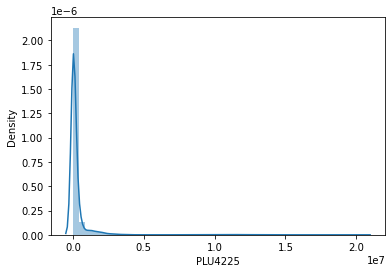

In [26]:
sns.distplot(df['PLU4225'],kde=True)

P4225' column is indicating Total number of avocado with PLU(size of the avocado) and ranges in between 0 to approx 0.4 and it is left skewed.

​

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

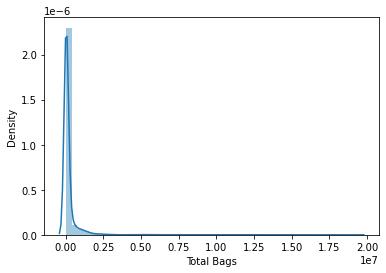

In [27]:
sns.distplot(df['Total Bags'],kde=True)

Total Bags ranges in between 0 to approx 0.25 and left skewed.

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

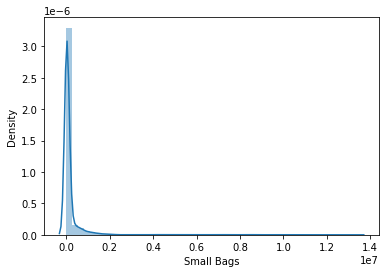

In [29]:
sns.distplot(df['Small Bags'],kde=True)

Small Bags ranges in between 0 to 0.2 and it is left skewed.

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

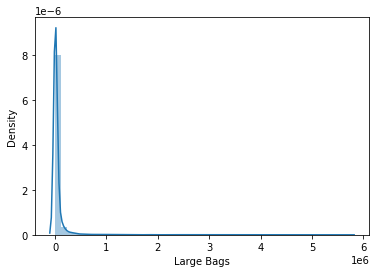

In [30]:
sns.distplot(df['Large Bags'],kde=True)

Large Bags ranges in between 0 to 1 and it is left skewed.

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

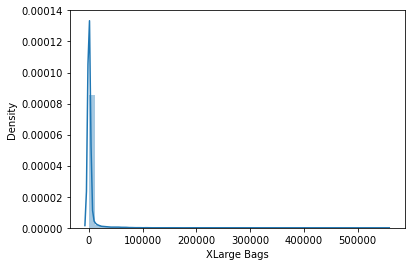

In [31]:
sns.distplot(df['XLarge Bags'],kde=True)

XLarge Bags ranges in between 0 to approx 100000 and it is left skewed.

<AxesSubplot:xlabel='year', ylabel='Density'>

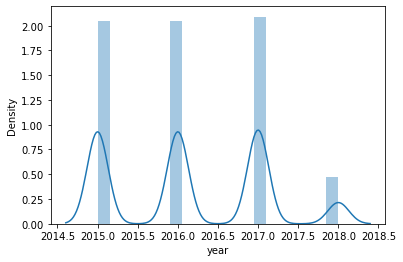

In [32]:
sns.distplot(df['year'],kde=True)

2015,2016 and 2017 are looking normal and 2018 is lookin least.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'PLU4046'}>],
       [<AxesSubplot:title={'center':'PLU4225'}>,
        <AxesSubplot:title={'center':'PLU4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

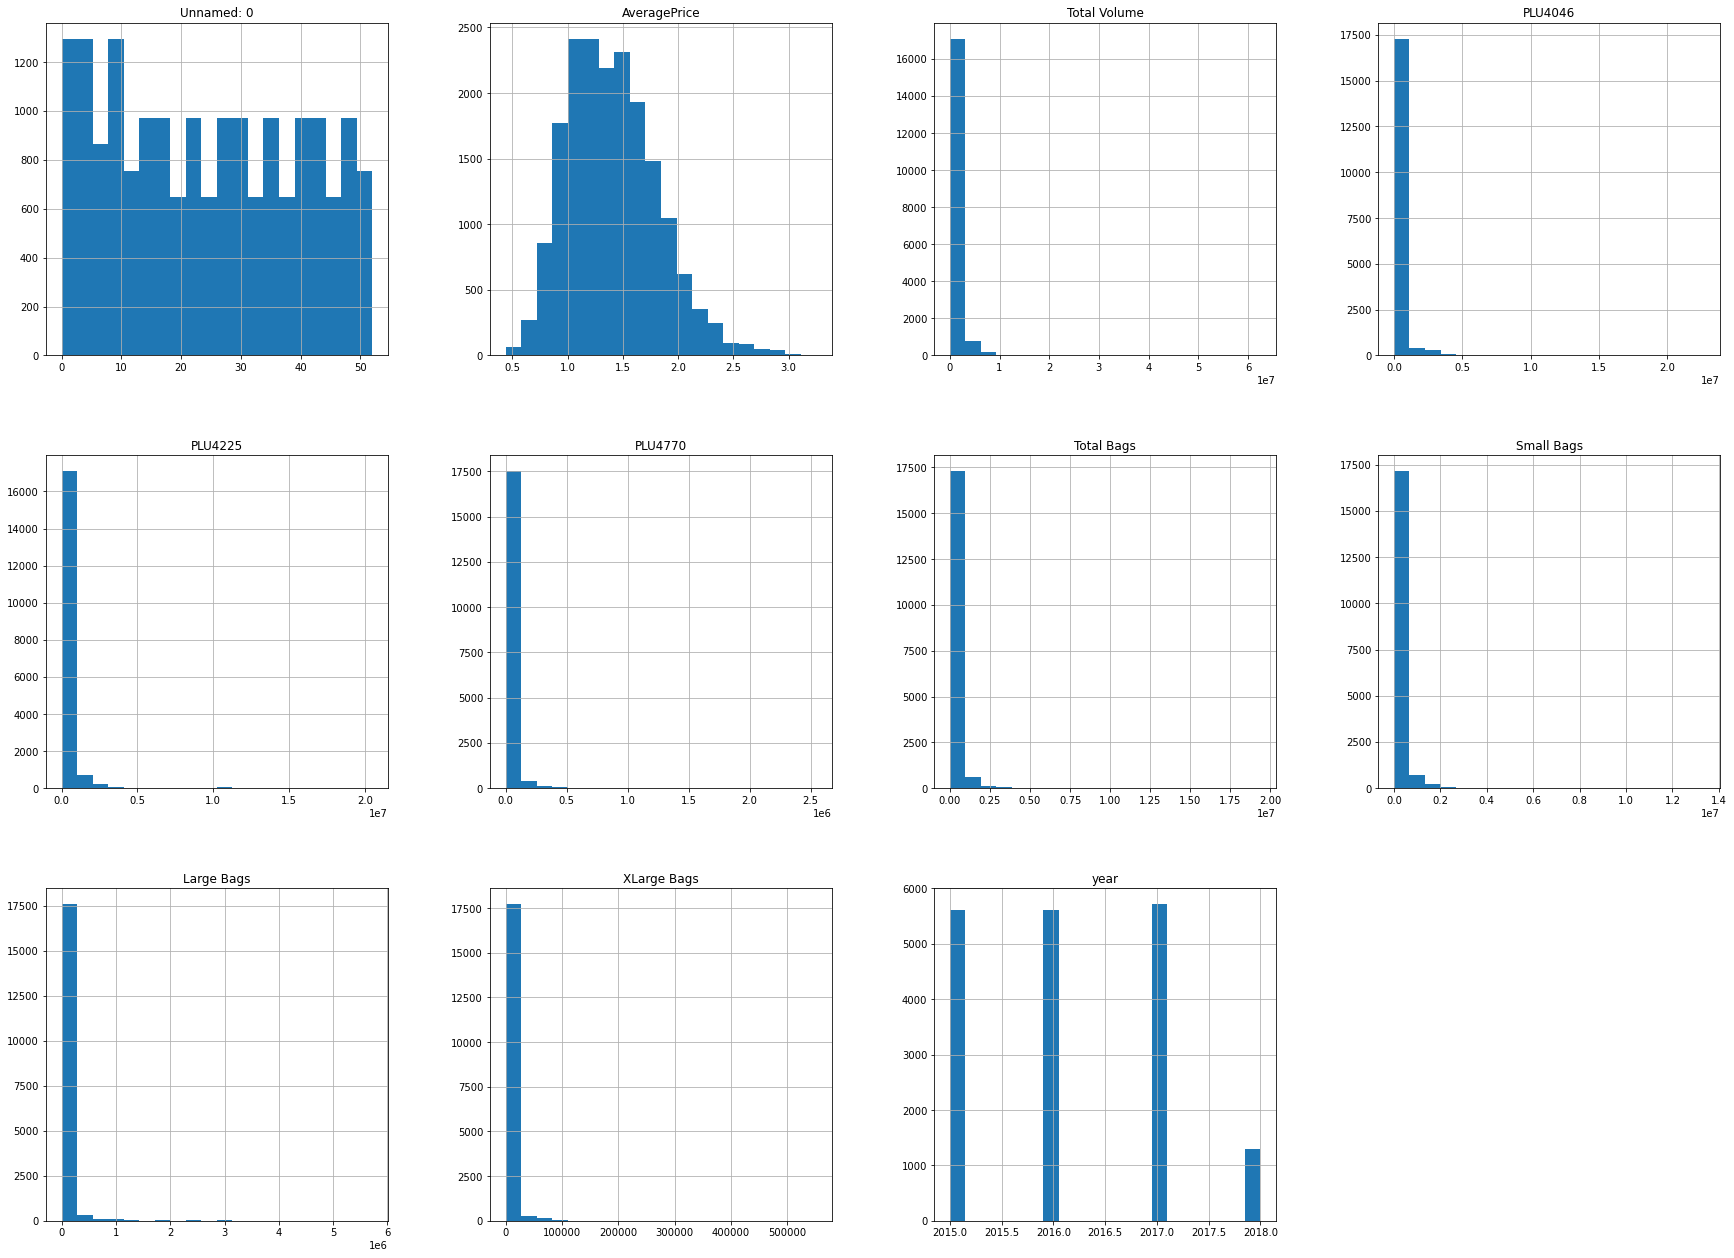

In [33]:
# visualizing through histogram

df.hist(figsize=(30,30),grid=True,layout=(4,4),bins=20)

in this above Histogram only average price column is looking normally distributed , and rest all are looking left skewed

# BIVARIATE ANALYSIS

In [34]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', 'PLU4046',
       'PLU4225', 'PLU4770', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

<AxesSubplot:title={'center':' comparison between Date  and AveragePrice'}, xlabel='Date', ylabel='AveragePrice'>

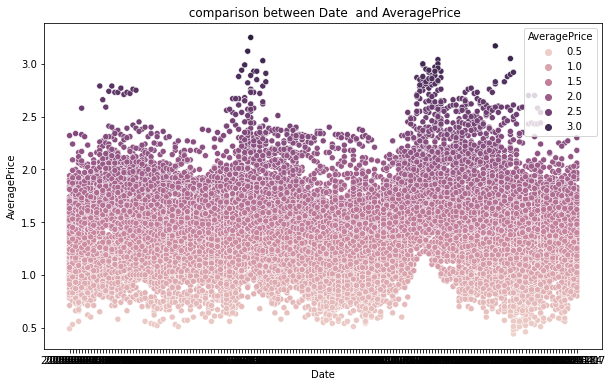

In [35]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Date  and AveragePrice')
sns.scatterplot(df['Date'], df['AveragePrice'],hue=df['AveragePrice'])

Scatter Plot is showing postivity

<AxesSubplot:title={'center':' comparison between Total Volume  and AveragePrice'}, xlabel='Total Volume', ylabel='AveragePrice'>

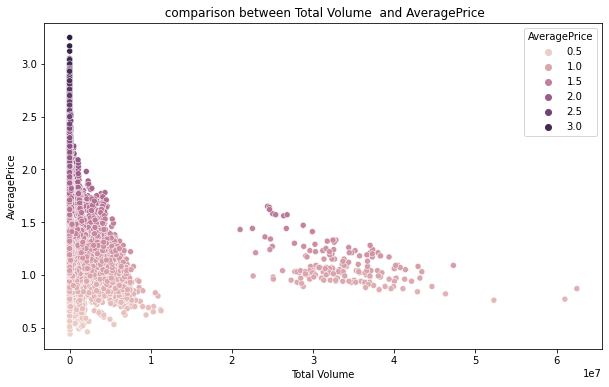

In [36]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Total Volume  and AveragePrice')
sns.scatterplot(df['Total Volume'], df['AveragePrice'],hue=df['AveragePrice'])

scatter plot is showing two groups of dots ,with not much positivity.



<AxesSubplot:title={'center':' comparison between PLU4046  and AveragePrice'}, xlabel='PLU4046', ylabel='AveragePrice'>

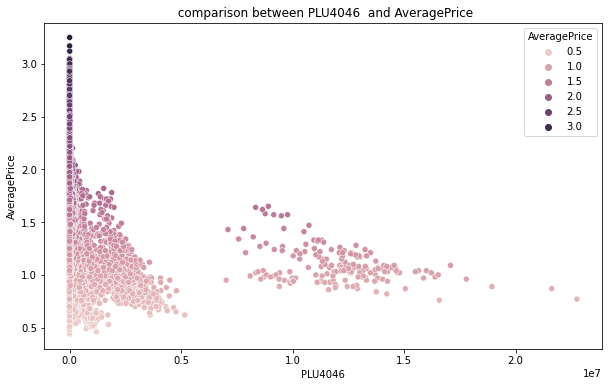

In [37]:
plt.figure(figsize=[10,6])
plt.title(' comparison between PLU4046  and AveragePrice')
sns.scatterplot(df['PLU4046'], df['AveragePrice'],hue=df['AveragePrice'])

n this scatter plot there is two groups of dots ,with not much positivity.

<AxesSubplot:title={'center':' comparison between PLU4225 and AveragePrice'}, xlabel='PLU4225', ylabel='AveragePrice'>

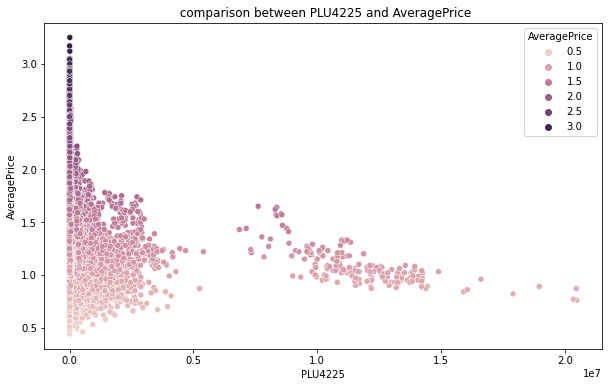

In [38]:
plt.figure(figsize=[10,6])
plt.title(' comparison between PLU4225 and AveragePrice')
sns.scatterplot(df['PLU4225'], df['AveragePrice'],hue=df['AveragePrice'])

There is two groups of dots with maximum number of dots in left side and very minimum number of dots in right side.

<AxesSubplot:title={'center':' comparison between Total Bags  and AveragePrice'}, xlabel='Total Bags', ylabel='AveragePrice'>

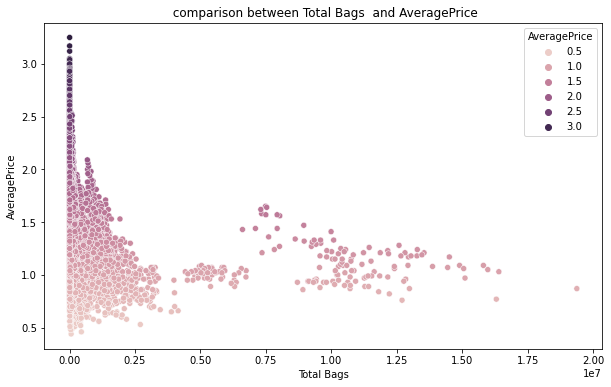

In [39]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Total Bags  and AveragePrice')
sns.scatterplot(df['Total Bags'], df['AveragePrice'],hue=df['AveragePrice'])

he comparison is very positive between range of 0 to 0.25 of Total bags with Average price.

# ENCODING THE DATAFRAME TO CONVERT STRING COLUMNS TO NUMERIC COLUMNS

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
enc=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i])

In [38]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


Now all the object type columns has been converted into numeric columns.



# CHECKING OUTLIERS THROUGH BOXPLOT

Unnamed: 0          AxesSubplot(0.125,0.71587;0.168478x0.16413)
Date             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
AveragePrice     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
PLU4046            AxesSubplot(0.125,0.518913;0.168478x0.16413)
PLU4225         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
PLU4770         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Small Bags         AxesSubplot(0.125,0.321957;0.168478x0.16413)
Large Bags      AxesSubplot(0.327174,0.321957;0.168478x0.16413)
XLarge Bags     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
type            AxesSubplot(0.731522,0.321957;0.168478x0.16413)
year                  AxesSubplot(0.125,0.125;0.168478x0.16413)
region             AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

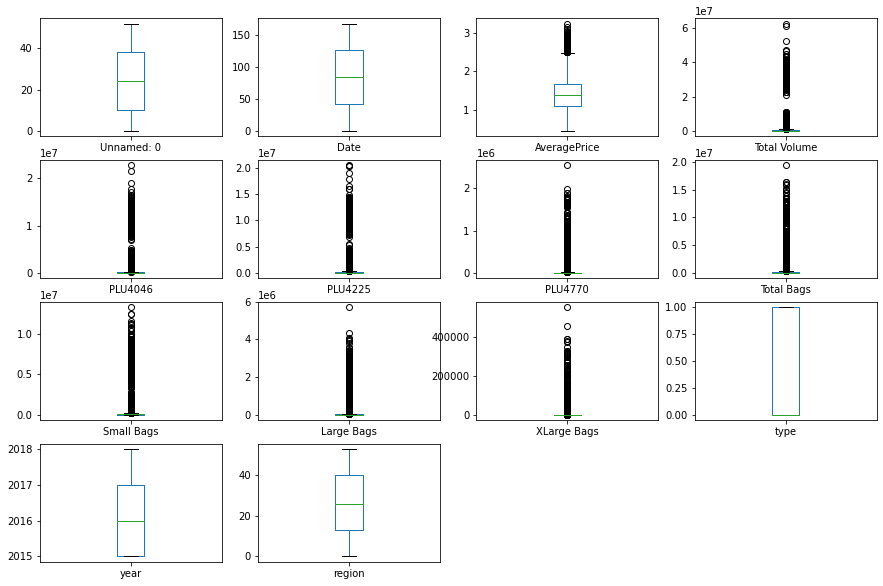

In [39]:
df.plot(kind='box', subplots=True ,layout=(4,4),figsize=(15,10))

Outliers are clearly visible in many of the columns , except 'Date','type','year' and 'region' column.

# STATISTICAL SUMMARY

In [40]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,15.481045,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,10.000000,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,24.000000,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,38.000000,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,52.000000,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


In some of the columns there is difference between mean and median(50%) and in some column mean and median(50%) are approximately same.

In some columns there is very big difference between 75% and maximum with outliers.

# CORRELATION MATRIX

In [41]:
cor=df.corr()
cor

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.419926,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
Date,-0.419926,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,-0.133008,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
PLU4046,0.017628,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
PLU4225,0.019829,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
PLU4770,0.041752,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768


<AxesSubplot:>

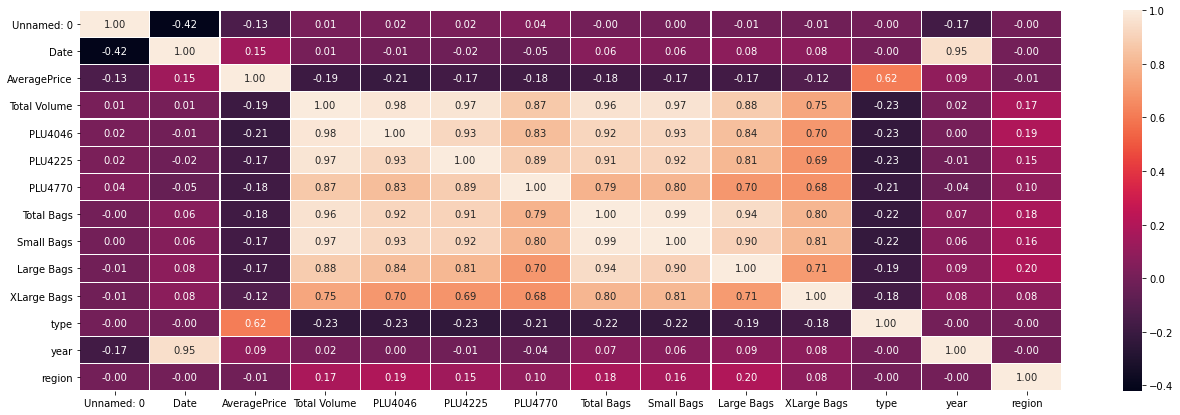

In [42]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths =0.1,fmt='0.2f')

type column is positively correlated with Average price that is our target column.

PLU4046 is negatively correlated with Average price.

Most of the column is showing positive correlation between eachn other.

# DROPPING UNNECESSARY COLUMNS

In [43]:
# Dropping date because year is given
df_=df.drop('Date',inplace=True,axis=1)


In [44]:
df.shape

(18249, 13)

# OUTLIER REMOVAL

In [45]:
from scipy.stats import zscore


In [46]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([3, 3, 9, ..., 1, 1, 1], dtype=int64))

In [47]:
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [48]:
df.shape

(18249, 13)

In [49]:
df_new.shape

(17651, 13)

In [50]:
18249-17651


598

So 598 rows has been removed as a outliers but data is becoming Nan and loosing the value so df_new will not tale out in further process.

# SEPRATING THE COLUMNS INTO X AND Y

In [51]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [52]:
x.shape

(18249, 12)

In [53]:
y.shape

(18249,)

# # Lets bring all features to a common scale


In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df)

x=pd.DataFrame(x,columns=df.columns)

# TRAIN TEST SPLIT

In [55]:
 from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.22, random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14234, 13)
(4015, 13)
(14234,)
(4015,)


# MODEL BUILDING

In [56]:
# importing libraries
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge ,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [57]:



#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 1.0
error
mean absolute error 4.58661751169551e-16
mean squared error 3.617858681005914e-31
root mean squared error 6.014863823068578e-16


In [58]:
# For Linear Regression (cross validation)


score=cross_val_score(lr,x,y,cv=10)
print('cv score',np.mean(score))


cv score 1.0


r2 score and cv score is predicting 100 % accuracy for Linear Regression.

# GRAPHH SHOWING THE PERFORMANCE OF MODEL

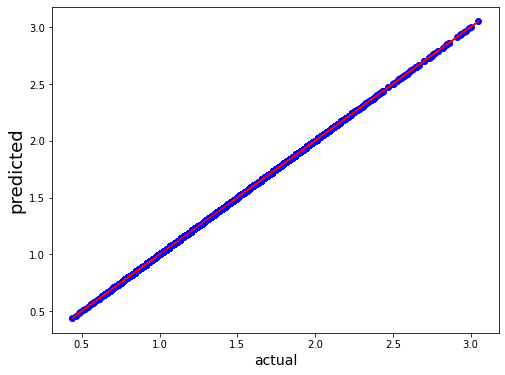

In [59]:
# Linear Regression

plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_y, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('actual',fontsize=14)
plt.ylabel('predicted',fontsize=18)
plt.show()

Best fit line is covering most of the data points.

 # REGULARIZATION

In [60]:
# for Lasso

ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score -0.0010076092940694004
error
mean absolute error 0.3231863786758627
mean squared error 0.1626978863583079
root mean squared error 0.4033582605554371


In [61]:
# For Lasso (cross validation)


score=cross_val_score(ls,x,y,cv=10)
print('cv score',np.mean(score))

cv score -1.2595845197761162


r2 score and cv score is very low for Lasso.

In [62]:


#For Ridge

rd=Ridge()

rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))



r2 score 0.9999999913917706
error
mean absolute error 2.866474064519865e-05
mean squared error 1.399130945745862e-09
root mean squared error 3.740495883898099e-05


In [63]:
# For Ridge (cross  validation)


score=cross_val_score(rd,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9999999882642593


r2 score is predicting 99% and cv score is predicting 99% accuracy score for Ridge

In [64]:
#For ElasticNet



en=ElasticNet()

en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score -0.0010076092940694004
error
mean absolute error 0.3231863786758627
mean squared error 0.1626978863583079
root mean squared error 0.4033582605554371


In [65]:

#For ElasticNet (cross validation)

score=cross_val_score(en,x,y,cv=10)
print('cv score',np.mean(score))

cv score -1.2595845197761162


r2 score and cv score is very low for Elastic Net.

# CLASSIFICATION ALGORITHMS A REGRESSION MODEL

In [66]:
from sklearn.neighbors import KNeighborsRegressor

In [67]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print(knr.score(x_train,y_train))

0.9935911594875013


KNeighborsRegressor is predicting 99 % accuracy score.

In [68]:

#For KNR (cross validation)

score=cross_val_score(knr,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9092981277675509


After cross validation KNeighborsRegressor's cv score is 76%.

Above predictions from the model , we can say that our model is performing well,

and Linear regression model is predicting 100 % accuracy in both r2 score and cross validation score.

Ridge model is predicting 99 % accuracy in both r2 score and cross validation score.

# ENSEMBLE TECHNIQUE

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [70]:
# Final model
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

r2 score: 99.99885394383287
cross val score: 99.99603414571732


we are getting model accuracy is 99.99% and cross validation as 99.99% which shows our model is performing extremely  well.

# SAVING THE MODEL

In [71]:
import pickle
filename='avocados_price.pkl'
pickle.dump(rf, open(filename, 'wb'))

# CONCLUSION

In [72]:
loaded_model=pickle.load(open('avocados_price.pkl','rb'))
result=loaded_model.score(x_test, y_test)
print(result)

0.9999885394383288


In [73]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion
                

,0,1,2,3,4,5,6,7,8,9,...,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014
predicted,1.47,1.82,1.55,1.61,1.15,1.76,1.27,0.97,2.31,1.29,...,1.67,1.56,1.85,1.98,1.84,1.39,1.23,1.71,1.49,0.99
original,1.47,1.82,1.55,1.61,1.15,1.76,1.27,0.97,2.31,1.29,...,1.67,1.56,1.85,1.98,1.84,1.39,1.23,1.71,1.49,0.99


With the help of Project , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on Average Price.

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.

